# Milestone 5
# DSC540-T303
# Ryan Krenke
# 05/23/24

## Merging the datasets with SQL and creating visualizations

In [28]:
import pandas as pd

In [29]:
import sqlite3

In [30]:
import csv

### Adding data to SQL database

In [141]:
#creating the database connection
with sqlite3.connect("C:/Users/ryanr/dsc540/airasthma.db") as conn:
    cursor = conn.cursor()

Note: I did not get errors creating the tables initially. I think I tried to re-do it so many times that it locked up - I'm not really sure. See below I created a 2nd database.  

In [142]:
#creating first table with air4 csv data
cursor.execute("CREATE TABLE air1 (State_Code  integer, Site_Num  integer, Parameter_Code  integer, Latitude  float, Longitude  float, Parameter  text, Units_of_Measure  text, Observation_Count  integer, Observation_Percent  integer, State_Name  text)")

OperationalError: database is locked

In [ ]:
#opening csv and contents into variable
file1 = open("C:/Users/ryanr/dsc540/air4.csv")
contents1 = csv.reader(file1)

In [ ]:
#code for inserting the records from the csv into the table
insertrecords1 = "INSERT INTO air1(State_Code, Site_Num, Parameter_Code, Latitude, Longitude, Parameter, Units_of_Measure, Observation_Count, Observation_Percent, State_Name) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"

In [ ]:
#executing the table
cursor.executemany(insertrecords1, contents1)

In [143]:
#creating second table with purpleair csv data
cursor.execute("CREATE TABLE air2(State  text, Date  integer, PM25  float)")

OperationalError: database is locked

In [36]:
#opening csv and contents into variable
file2 = open("C:/Users/ryanr/dsc540/purpleair.csv")
contents2 = csv.reader(file2)

In [37]:
#code for inserting the records from the csv into the table
insertrecords2 = "INSERT INTO air2(State, Date, PM25) VALUES(?, ?, ?)"

In [38]:
#executing the table
cursor.executemany(insertrecords2, contents2)

In [125]:
#creating third table with asthma csv data
cursor.execute("CREATE TABLE asthma(State  text, Number_With_Current_Asthma  integer, Percent_With_Current_Asthma  float, Latitude  float, Longitude  float)")

OperationalError: table asthma already exists

In [126]:
#opening csv and contents into variable
file3 = open("C:/Users/ryanr/dsc540/asthma.csv")
contents3 = csv.reader(file3)

In [127]:
#code for inserting the records from the csv into the table
insertrecords3 = "INSERT INTO asthma(State, Number_With_Current_Asthma, Percent_With_Current_Asthma, Latitude, Longitude) VALUES(?, ?, ?, ?, ?)"

In [128]:
#executing the table
cursor.executemany(insertrecords3, contents3)

In [133]:
res = cursor.execute("SELECT * FROM asthma") #just checking with a smaller table
for row in res:
    print(row)

('State', 'Number With Current Asthma', 'Percent With Current Asthma', 'Latitude', 'Longitude')
('Alabama', 394199, 10.1, 32.806671, -86.79113)
('Alaska', 49453, 9.0, 61.370716, -152.404419)
('Arizona', 519749, 9.4, 33.729759, -111.431221)
('Arkansas', 207857, 9.0, 34.969704, -92.373123)
('California', 2694396, 8.8, 36.116203, -119.681564)
('Colorado', 476932, 10.4, 39.059811, -105.311104)
('Connecticut', 300910, 10.5, 41.597782, -72.755371)
('Delaware', 77695, 9.8, 39.318523, -75.507141)
('District of Columbia', 64298, 11.6, 38.897438, -77.026817)
('Georgia', 772663, 9.4, 33.040619, -83.643074)
('Hawaii', 92849, 8.1, 21.094318, -157.498337)
('Idaho', 138516, 9.8, 44.240459, -114.478828)
('Illinois', 860395, 8.7, 40.349457, -88.986137)
('Indiana', 536397, 10.3, 39.849426, -86.258278)
('Iowa', 224466, 9.1, 42.011539, -93.210526)
('Kansas', 235953, 10.6, 38.5266, -96.726486)
('Kentucky', 408801, 11.7, 37.66814, -84.670067)
('Louisiana', 344842, 9.7, 31.169546, -91.867805)
('Maine', 13839

### Merge 1 (2 tables)

From my previous milestones, I know that my air quality datasets do not have all of the states in both, but do between the two. So my first merge of the data tables will be to combine to have all the states. 

In [75]:
#Using UNION to merge the two tables related to air quality - selecting state and air quality columns from each
cursor.execute("SELECT State_Name, Observation_Count FROM air1 WHERE Parameter='PM2.5 - Local Conditions' UNION ALL SELECT State, PM25 FROM air2")

In [145]:
conn.commit()

In [76]:
# making dataframe of merged air quality data
pm25df = pd.DataFrame(cursor.fetchall(), columns=["State", "PM2.5"])

In [77]:
pm25df

,State,PM2.5
0,Alabama,4005
1,Alabama,166
2,Alabama,166
3,Alabama,166
4,Alabama,166
...,...,...
74340,Texas,9.0
74341,Texas,6.7
74342,Texas,5.0
74343,Texas,5.4


In [79]:
pm25df.to_csv('pm25.csv', index=True) #export to csv to double check on computer

In [80]:
#dropping the row at index 10379 because it contains string data
pm25df = pm25df.drop(index=10379)

In [81]:
#transforming the PM2.5 column data to all float data
pm25df["PM2.5"] = pm25df["PM2.5"].astype(float)

In [82]:
#calling the mean of PM2.5 data grouped by state
pm25dfgrouped = pm25df.groupby(by="State")["PM2.5"].mean()

In [83]:
pm25dfgrouped

State
Alabama                  15.290440
Alaska                  317.190476
Arizona                 627.779661
Arkansas                108.394495
California               61.416948
Colorado                 24.617464
Connecticut             494.343434
Delaware                  4.501296
District Of Columbia    707.122222
Florida                 586.588983
Georgia                 426.472868
Hawaii                  718.810606
Idaho                   109.350000
Illinois                598.651079
Indiana                 515.372654
Iowa                    474.362791
Kansas                  647.781818
Kentucky                630.938650
Louisiana               289.496689
Maine                    11.033744
Maryland                715.021807
Massachusetts           596.171598
Michigan                523.162896
Minnesota                18.840231
Mississippi             637.338235
Missouri                538.006757
Montana                 620.564045
Nebraska                623.833333
Nevada        

In [63]:
import matplotlib.pyplot as plt

### Visualization 1

<Axes: title={'center': 'Average Air Quality by State'}, xlabel='State', ylabel='PM2.5'>

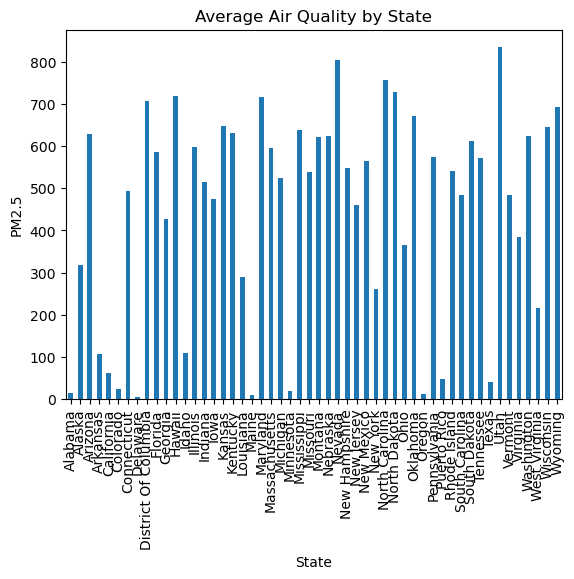

In [93]:
pm25dfgrouped.plot(kind='bar', title="Average Air Quality by State", ylabel="PM2.5", xlabel="State")

### Adding data to new SQL database due to error in first database

As mentioned above, my original database had an error so I created a new database with the same steps as above

In [148]:
with sqlite3.connect("C:/Users/ryanr/dsc540/airasthma1.db") as conn:
    cursor = conn.cursor()

In [149]:
cursor.execute("CREATE TABLE air1 (State_Code  integer, Site_Num  integer, Parameter_Code  integer, Latitude  float, Longitude  float, Parameter  text, Units_of_Measure  text, Observation_Count  integer, Observation_Percent  integer, State_Name  text)")

In [150]:
file1 = open("C:/Users/ryanr/dsc540/air4.csv")
contents1 = csv.reader(file1)

In [151]:
insertrecords1 = "INSERT INTO air1(State_Code, Site_Num, Parameter_Code, Latitude, Longitude, Parameter, Units_of_Measure, Observation_Count, Observation_Percent, State_Name) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"

In [152]:
cursor.executemany(insertrecords1, contents1)

In [153]:
cursor.execute("CREATE TABLE air2(State  text, Date  integer, PM25  float)")

In [154]:
file2 = open("C:/Users/ryanr/dsc540/purpleair.csv")
contents2 = csv.reader(file2)

In [155]:
insertrecords2 = "INSERT INTO air2(State, Date, PM25) VALUES(?, ?, ?)"

In [156]:
cursor.executemany(insertrecords2, contents2)

In [157]:
cursor.execute("CREATE TABLE asthma(State  text, Number_With_Current_Asthma  integer, Percent_With_Current_Asthma  float, Latitude  float, Longitude  float)")

In [158]:
file3 = open("C:/Users/ryanr/dsc540/asthma.csv")
contents3 = csv.reader(file3)

In [159]:
insertrecords3 = "INSERT INTO asthma(State, Number_With_Current_Asthma, Percent_With_Current_Asthma, Latitude, Longitude) VALUES(?, ?, ?, ?, ?)"

In [160]:
cursor.executemany(insertrecords3, contents3)

In [161]:
conn.commit()

### Merge 2 (all 3 tables)

In [163]:
# Using both UNION and JOIN to combine all 3 tables - union 2 columns from air datasets and left join with the asthma data on the state columns
cursor.execute("SELECT * FROM(SELECT State_Name, Observation_Count FROM air1 WHERE Parameter='PM2.5 - Local Conditions' UNION ALL SELECT State, PM25 FROM air2) AS X LEFT JOIN asthma Percent_With_Current_Asthma ON State = X.State_Name")

In [164]:
#creating dataframe from sql data
asthmadf = pd.DataFrame(cursor.fetchall())

In [165]:
asthmadf.to_csv('asthmatest.csv', index=True) #sending to csv to doublecheck on computer

In [167]:
#naming the dataframe columns
asthmadf.columns = ['State1', 'PM2.5', 'State2', 'Number Asthma', 'Percent With Current Asthma', 'Latitude', 'Longitude']

In [169]:
# removing the index with string data from joined headers
asthmadf = asthmadf.drop(index=10379)

In [170]:
asthmadf

,State1,PM2.5,State2,Number Asthma,Percent With Current Asthma,Latitude,Longitude
0,Alabama,4005,Alabama,394199,10.1,32.806671,-86.79113
1,Alabama,166,Alabama,394199,10.1,32.806671,-86.79113
2,Alabama,166,Alabama,394199,10.1,32.806671,-86.79113
3,Alabama,166,Alabama,394199,10.1,32.806671,-86.79113
4,Alabama,166,Alabama,394199,10.1,32.806671,-86.79113
...,...,...,...,...,...,...,...
74340,Texas,9.0,Texas,1854306,8.4,31.054487,-97.563461
74341,Texas,6.7,Texas,1854306,8.4,31.054487,-97.563461
74342,Texas,5.0,Texas,1854306,8.4,31.054487,-97.563461
74343,Texas,5.4,Texas,1854306,8.4,31.054487,-97.563461


### Visualization 2

In [172]:
# means of asthma percents grouped by state
asthmadfgrouped = asthmadf.groupby(by="State1")["Percent With Current Asthma"].mean()

<Axes: title={'center': 'Percent Asthma by State'}, xlabel='State', ylabel='Percent'>

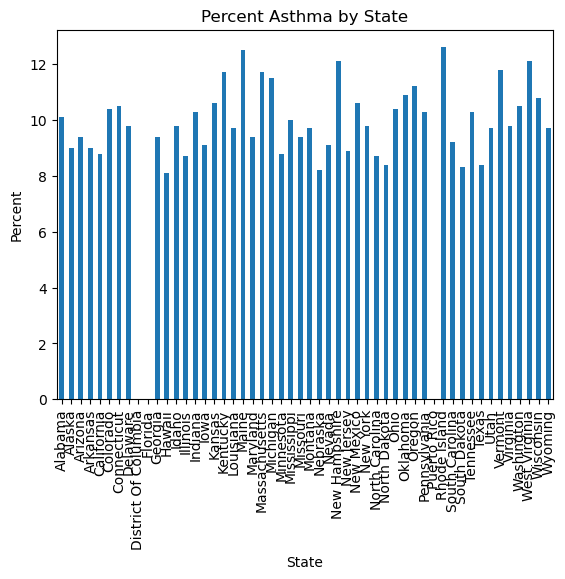

In [173]:
# created bar chart of state grouped percent asthma
asthmadfgrouped.plot(kind='bar', title="Percent Asthma by State", ylabel="Percent", xlabel="State")

### Visualization 3

This is the main visualization I had in my head since the beginning of the project. This is the best way to visualize the connection between air quality and asthma.

<Axes: title={'center': 'Scatterplot of Air Quality vs Asthma'}, xlabel='PM2.5', ylabel='Percent With Current Asthma'>

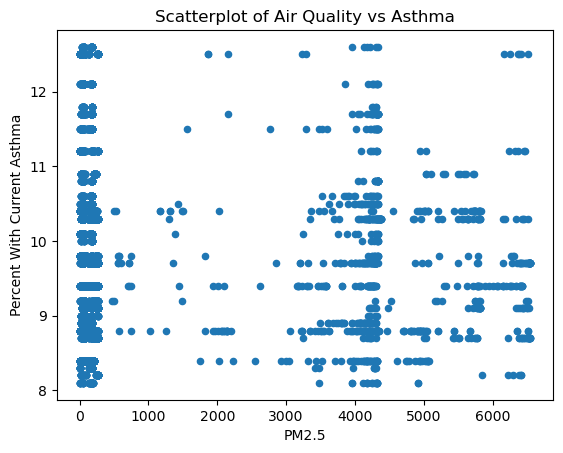

In [175]:
# creating scatter plot of air quality vs percent with current asthma
asthmadf.plot.scatter(x = 'PM2.5', y = 'Percent With Current Asthma', title="Scatterplot of Air Quality vs Asthma")

Looking back at the bar chart of asthma percentages by state, I can see that certain states are higher. I will create a new dataframe with 5 of the higher states.  

In [183]:
#creating new dataframe with rows that contain string values of states listed
asthmadf2 = asthmadf[asthmadf["State1"].str.contains('Rhode Island|Maine|New Hampshire|West Virginia|Vermont')]

In [184]:
asthmadf2

,State1,PM2.5,State2,Number Asthma,Percent With Current Asthma,Latitude,Longitude
3860,Maine,6161,Maine,138396,12.5,44.693947,-69.381927
3861,Maine,254,Maine,138396,12.5,44.693947,-69.381927
3862,Maine,254,Maine,138396,12.5,44.693947,-69.381927
3863,Maine,254,Maine,138396,12.5,44.693947,-69.381927
3864,Maine,254,Maine,138396,12.5,44.693947,-69.381927
...,...,...,...,...,...,...,...
27655,Maine,0.1,Maine,138396,12.5,44.693947,-69.381927
27656,Maine,0.1,Maine,138396,12.5,44.693947,-69.381927
27657,Maine,0.1,Maine,138396,12.5,44.693947,-69.381927
27658,Maine,0.1,Maine,138396,12.5,44.693947,-69.381927


### Visualization 4

C:\Users\ryanr\AppData\Local\Temp\ipykernel_70992\3979982645.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  asthmadf2.groupby(["State1"]).mean().plot(kind='pie', y='Percent With Current Asthma', title='Chart of Top Asthma States')


<Axes: title={'center': 'Chart of Top Asthma States'}, ylabel='Percent With Current Asthma'>

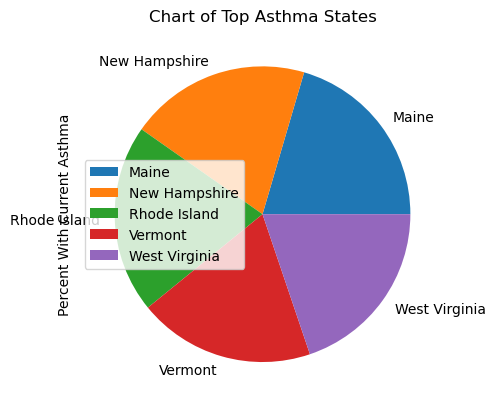

In [189]:
#creating pie chart of the averages of the states with the highest asthma percents
asthmadf2.groupby(["State1"]).mean().plot(kind='pie', y='Percent With Current Asthma', title='Chart of Top Asthma States')

Similarly, there are also states that appear higher for having higher air quality values. I will create a new dataframe with just those states.  

In [185]:
# creating new dataframe with rows that contain string values of states listed
airdf = asthmadf[asthmadf["State1"].str.contains('Hawaii|Utah|Nevada|North Carolina|North Dakota')]

In [186]:
airdf

,State1,PM2.5,State2,Number Asthma,Percent With Current Asthma,Latitude,Longitude
2373,Hawaii,4920,Hawaii,92849,8.1,21.094318,-157.498337
2374,Hawaii,4920,Hawaii,92849,8.1,21.094318,-157.498337
2375,Hawaii,202,Hawaii,92849,8.1,21.094318,-157.498337
2376,Hawaii,202,Hawaii,92849,8.1,21.094318,-157.498337
2377,Hawaii,202,Hawaii,92849,8.1,21.094318,-157.498337
...,...,...,...,...,...,...,...
9486,Utah,266,Utah,231080,9.7,40.150032,-111.862434
9487,Utah,266,Utah,231080,9.7,40.150032,-111.862434
9488,Utah,266,Utah,231080,9.7,40.150032,-111.862434
9489,Utah,266,Utah,231080,9.7,40.150032,-111.862434


### Visualization 5

C:\Users\ryanr\AppData\Local\Temp\ipykernel_70992\1967351320.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airdf.groupby(["State1"]).mean().plot(kind='pie', y='PM2.5', title='Chart of Worst Air Quality States')


<Axes: title={'center': 'Chart of Worst Air Quality States'}, ylabel='PM2.5'>

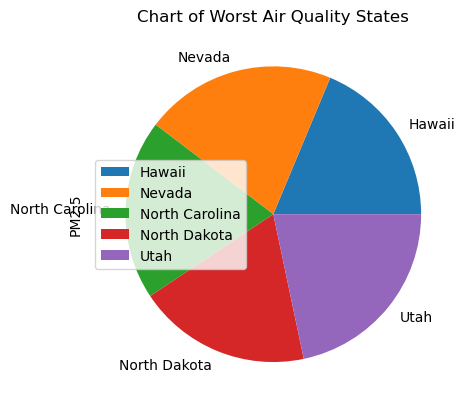

In [190]:
#creating pie chart of the averages of the states with the highest air quality values
airdf.groupby(["State1"]).mean().plot(kind='pie', y='PM2.5', title='Chart of Worst Air Quality States')

For this final milestone, I was able to combine all the data I gathered on air quality from two sources with a SQL Union which ensured I had data from all 50 states. I was then able to use a Join to add in the data I sourced on prevalence of asthma in the US. I did mention in the beginning that I was going to attempt to merge my data based on the latitude and longitude data. As the project went on, I could tell right away that that was going to be difficult, so I am glad that I included the state values also, though I made an assumption that using the average coordinates was acceptable for creating the needed state data. 

As I mentioned previously, all my data appeared to be gathered in an ethical way being from controlled studies or open source sensors. I am dealing with some CDC and EPA (government) data, so there are some regulatory implications that I need to be transparent with. Also, the API source was a private company that sells the sensors the data is gathered from, so I am again transparent that I question if they have any incentive to alter the data. Also, my data came from the date range of 2021 through present-day - I consider this a fairly small date range, however someone with more expertise in air quality or asthma might disagree. One anomaly that I was not able to address with my data is the missing asthma data from the state of Florida. There is data from nearby states, but this is a state with a considerable population and a unique climate, I need to be transparent that it is missing.    

I did make another assumption in this milestone when completing the union of the air quality data: I combined what appeared to be similar "PM2.5" data into one data column. Truthfully, I would have to complete much more research on air quality monitoring or consult an expert to see if this was acceptable if I were to take this project further or share it more publicly, in order to not risk any ethic violations. 

Looking back at the initial goal of this project, I feel like I was successful in creating a combined dataset that can be used for further analysis in comparing air quality readings in the United States versus the states with the highest prevalence of asthma. 